# Time Series Analysis

In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### White Noise

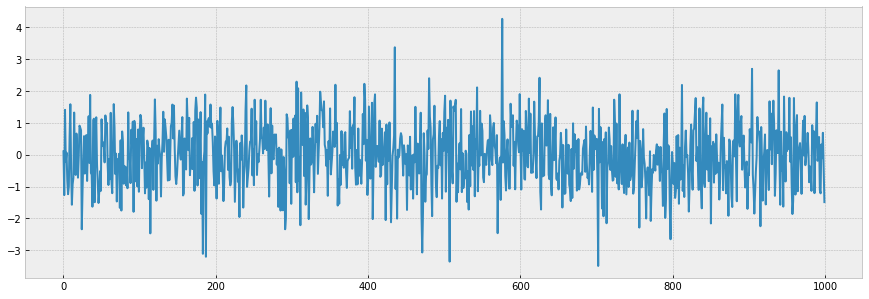

In [51]:
white_noise = np.random.normal(size=1000)
with plt.style.context('bmh'):  
    plt.figure(figsize=(15, 5))
    plt.plot(white_noise)

## Example 1: UFO Encounter Data

In [52]:
data = pd.read_csv('ufo.csv')
data.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [53]:
data.info() #Time column is object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             18216 non-null  object
 1   Colors Reported  2882 non-null   object
 2   Shape Reported   15597 non-null  object
 3   State            18241 non-null  object
 4   Time             18241 non-null  object
dtypes: object(5)
memory usage: 712.7+ KB


In [54]:
data['Time'][0]

'6/1/1930 22:00'

In [55]:
type(data['Time'][0])

str

In [56]:
data['Time'] = pd.to_datetime(data['Time']) #convert to a format that allows to work with date and time
data['Time'][0]

Timestamp('1930-06-01 22:00:00')

In [57]:
type(data['Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [58]:
data.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


We can extract date and time parts from a datetime column, such as date, year, month, hours, minutes, etc.

In [59]:
data['Time'][0].year 

1930

In [60]:
data['Time'][0].month 

6

In [61]:
data['Time'][0].day 

1

In [62]:
data['Time'][0].hour

22

In [63]:
data['Time'][0].minute 

0

In [64]:
data['Time'][0].second 

0

In [65]:
data['Time'][0].week #week number

22

In [66]:
data['Time'][0].day_name() 

'Sunday'

In [67]:
data['Time'].dt.year.head() #column with years

0    1930
1    1930
2    1931
3    1931
4    1933
Name: Time, dtype: int64

In [68]:
data['Time'].dt.day_name().head() 

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

Number of UFOs in different years.

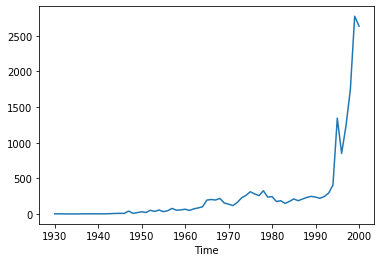

In [69]:
data.groupby(data['Time'].dt.year).size().plot()

Number of UFOs by day of the week.

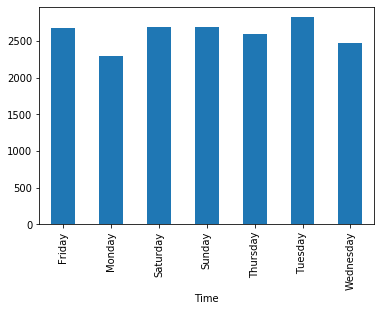

In [70]:
data.groupby(data['Time'].dt.day_name()).size().plot(kind = 'bar') #

Number of UFOs by hour.

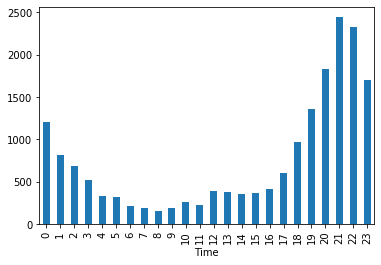

In [71]:
data.groupby(data['Time'].dt.hour).size().plot(kind = 'bar')

Timestamp column can become an index.

In [72]:
data.index = data['Time']
data.head()

,City,Colors Reported,Shape Reported,State,Time
Time,,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
1931-06-01 13:00:00,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [73]:
data.loc["2000-06-01"].head(5) #values for a specific date

,City,Colors Reported,Shape Reported,State,Time
Time,,,,,
2000-06-01 00:00:00,Joshua Tree National Park,NaN,OVAL,CA,2000-06-01 00:00:00
2000-06-01 01:00:00,Auburn,NaN,OVAL,WA,2000-06-01 01:00:00
2000-06-01 02:00:00,San Francisco,NaN,FORMATION,CA,2000-06-01 02:00:00
2000-06-01 12:00:00,Powhatan,NaN,LIGHT,VA,2000-06-01 12:00:00
2000-06-01 13:00:00,Livonia,NaN,DISK,MI,2000-06-01 13:00:00


In [74]:
data.loc["June 1 2000"].head(5) #the same result

,City,Colors Reported,Shape Reported,State,Time
Time,,,,,
2000-06-01 00:00:00,Joshua Tree National Park,NaN,OVAL,CA,2000-06-01 00:00:00
2000-06-01 01:00:00,Auburn,NaN,OVAL,WA,2000-06-01 01:00:00
2000-06-01 02:00:00,San Francisco,NaN,FORMATION,CA,2000-06-01 02:00:00
2000-06-01 12:00:00,Powhatan,NaN,LIGHT,VA,2000-06-01 12:00:00
2000-06-01 13:00:00,Livonia,NaN,DISK,MI,2000-06-01 13:00:00


In [75]:
data.loc["June 2000"].head() #values for a specific month

,City,Colors Reported,Shape Reported,State,Time
Time,,,,,
2000-06-01 00:00:00,Joshua Tree National Park,NaN,OVAL,CA,2000-06-01 00:00:00
2000-06-01 01:00:00,Auburn,NaN,OVAL,WA,2000-06-01 01:00:00
2000-06-01 02:00:00,San Francisco,NaN,FORMATION,CA,2000-06-01 02:00:00
2000-06-01 12:00:00,Powhatan,NaN,LIGHT,VA,2000-06-01 12:00:00
2000-06-01 13:00:00,Livonia,NaN,DISK,MI,2000-06-01 13:00:00


## Example 2: Airline Passenger Data

In [76]:
df = pd.read_csv("AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


We can see that the data contains a column labeled “Month” that contains dates. In that column, the dates are formatted as year–month. We also see that the data starts in the year 1949. The second column is labeled “#Passengers,” and it contains the number of passengers for the year–month. 

Next we convert the month column into a datetime object. This will allow it to programmatically pull time values like the year or month for each record. To do this, we use the Pandas to_datetime() method. This process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [78]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m') 
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


The next thing we can do is convert the month column to an index. This will allow us to more easily work with some of the packages.

In [80]:
df.index = df['Month']
del df['Month']
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Text(0, 0.5, 'Number of Passengers')

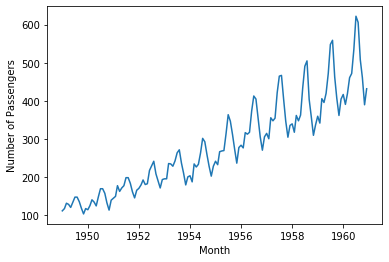

In [81]:
sns.lineplot(data=df, x=df.index, y=df['#Passengers']) #time series plot
plt.ylabel('Number of Passengers')

### Moving average

Let’s overlay the time series with the seven-month rolling mean and seven-month rolling standard deviation.

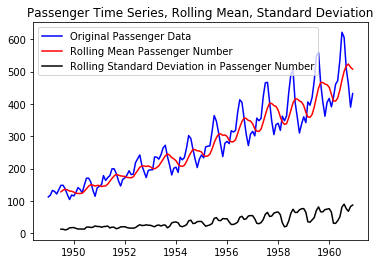

In [82]:
plt.plot(df, color="blue",label="Original Passenger Data") 
rolling_mean = df.rolling(7).mean() 
plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number") 
rolling_std = df.rolling(7).std()
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

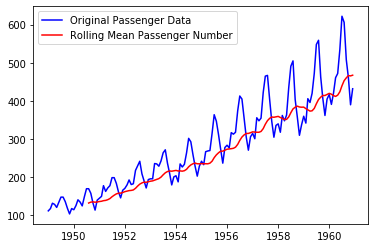

In [83]:
plt.plot(df, color="blue",label="Original Passenger Data") 
rolling_mean = df.rolling(20).mean() #20-month rolling mean 
plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number") 
plt.legend(loc="best")

### Stationarity

Stationarity is a key part of time series analysis. Stationarity means that the manner in which time series data changes is constant. A stationary time series will not have any trends or seasonal patterns. You should check for stationarity because it not only makes modeling time series easier, but it is an underlying assumption in many time series methods. Specifically, stationarity is assumed for a wide variety of time series forecasting methods including ARIMA.

### Dickey Fuller test 

This test will generate a p-value, which will allow us to accept or reject the null hypothesis that there is no stationarity. If we reject the null hypothesis, that means we accept the alternative, which states that there is stationarity.

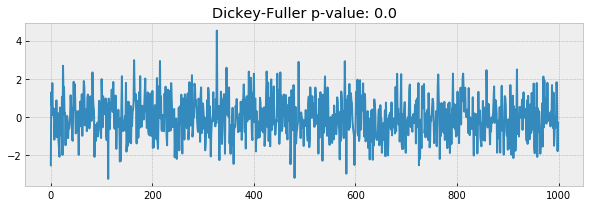

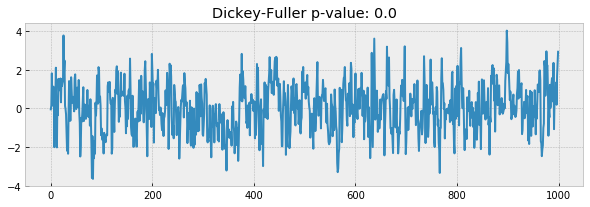

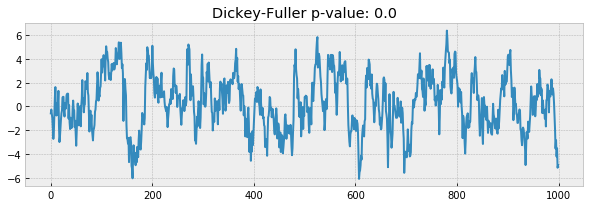

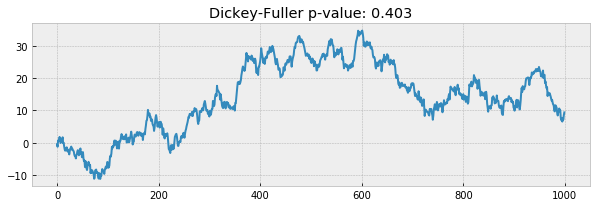

In [84]:
def plotProcess(n_samples=1000, rho=0):
    x = w = np.random.normal(size=n_samples)
    for t in range(n_samples):
        x[t] = rho * x[t-1] + w[t]

    with plt.style.context('bmh'):  
        plt.figure(figsize=(10, 3))
        plt.plot(x)
        plt.title("Dickey-Fuller p-value: {}".format(round(sm.tsa.stattools.adfuller(x)[1], 3)))
        
for rho in [0, 0.6, 0.9, 1]:
    plotProcess(rho=rho)

In [85]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(df,autolag="AIC")

In [86]:
print('p-value: ', adft[1])

p-value:  0.9918802434376409


We can see that our data is not stationary from the fact that our p-value is greater than 0.05.

In [87]:
df['#Passengers_dif1'] = df['#Passengers'] - df['#Passengers'].shift(1) #one lag differencing
adft = adfuller(df['#Passengers_dif1'].dropna(),autolag="AIC")
print('p-value: ', adft[1])

p-value:  0.05421329028382609


After one lag differencing the p-value decreases.

In [88]:
df['#Passengers_dif2'] = df['#Passengers'] - df['#Passengers'].shift(2) #two lags differencing
adft = adfuller(df['#Passengers_dif2'].dropna(),autolag="AIC")
print('p-value: ', adft[1])

p-value:  0.038629757676988195


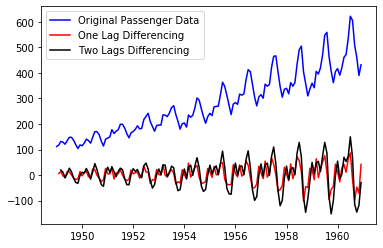

In [89]:
plt.plot(df['#Passengers'], color="blue",label="Original Passenger Data")
plt.plot(df['#Passengers_dif1'], color="red", label="One Lag Differencing")
plt.plot(df['#Passengers_dif2'], color="black", label = "Two Lags Differencing") 
plt.legend(loc="best")

### Autocorrelation

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.

In [90]:
autocorrelation_lag1 = df['#Passengers'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.9601946480498522


In [91]:
autocorrelation_lag3 = df['#Passengers'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df['#Passengers'].autocorr(lag=6) 
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df['#Passengers'].autocorr(lag=9) 
print("Nine Month Lag: ", autocorrelation_lag9)

Three Month Lag:  0.837394765081794
Six Month Lag:  0.7839187959206183
Nine Month Lag:  0.8278519011167602


We see that, even with a nine-month lag, the data is highly autocorrelated. This is further illustration of the short- and long-term trends in the data.

C:\Users\amelikyan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


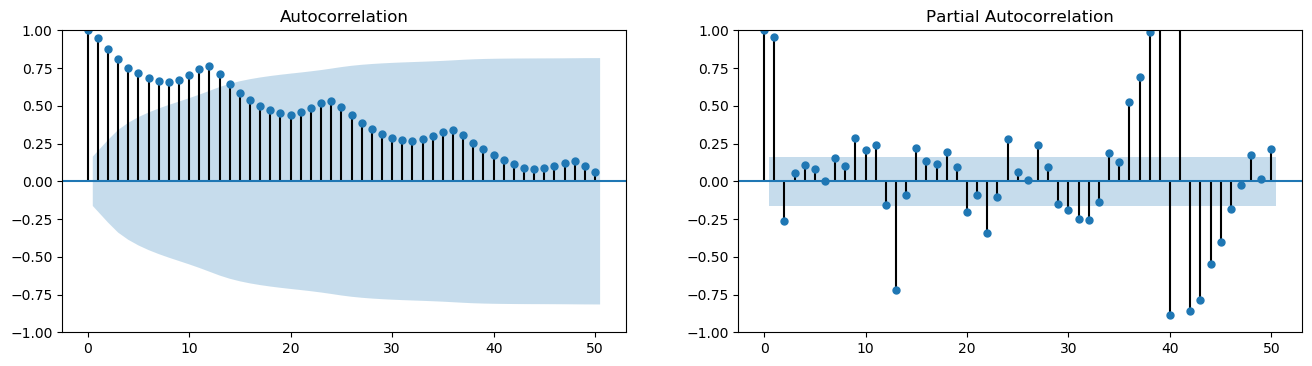

In [92]:
fig, axes = plt.subplots(1,2,figsize=(16,4), dpi= 100)
plot_acf(df['#Passengers'], lags=50, ax=axes[0])
plot_pacf(df['#Passengers'], lags=50, ax=axes[1])
plt.show()

### Forecasting

Time series forecasting allows us to predict future values in a time series given current and past data. Here, we will use the ARIMA method to forecast the number of passengers, which allows us to forecast future values in terms of a linear combination of past values. First, let’s split our data for training and testing and visualize the split.

In [93]:
df = pd.read_csv("AirPassengers.csv")
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.index = df['Month']
del df['Month']

In [94]:
df['Date'] = df.index
train = df[df['Date'] < "1960-08"]
del train['Date']
train = train.rename(columns={'#Passengers': 'train'}) 
train

,train
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-03-01,419
1960-04-01,461
1960-05-01,472


In [95]:
test = df[df['Date'] >= "1960-08"]
del test['Date']
test = test.rename(columns={'#Passengers': 'test'}) 
test

,test
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


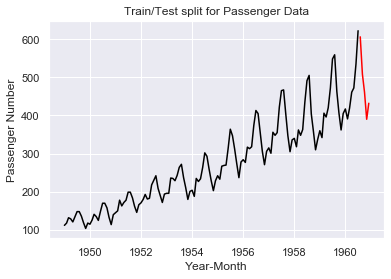

In [98]:
plt.plot(train, color = "black")
plt.plot(test, color = "red") 
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()

The black line corresponds to our training data and the red line corresponds to our test data.

### ARIMA

In [99]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1352.593, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1340.702, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1336.259, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1352.415, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1329.986, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1335.098, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1336.923, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1329.407, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1335.407, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1339.796, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1325.560, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1336.3

We select a model with the lowest Akaike information criterion. Now, let’s display the output of our model.

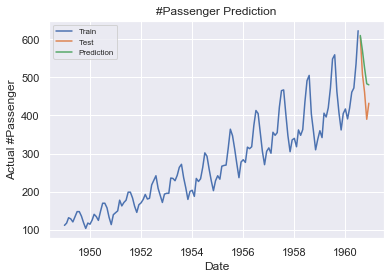

In [100]:
plt.plot(train, label='Train') 
plt.plot(test, label='Test') 
plt.plot(forecast, label='Prediction') 

plt.title('#Passenger Prediction')
plt.xlabel('Date')
plt.ylabel('Actual #Passenger')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Our predictions are shown in green and the actual values are shown in orange.

In [101]:
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

In [102]:
from statsmodels.tsa.arima.model import ARIMA
model  =  ARIMA(df['#Passengers'], order=(4, 1, 3))
res = model.fit()
print(res.summary())

C:\Users\amelikyan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\amelikyan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -674.913
Date:                Tue, 17 May 2022   AIC                           1365.825
Time:                        23:09:05   BIC                           1389.528
Sample:                    01-01-1949   HQIC                          1375.457
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.3

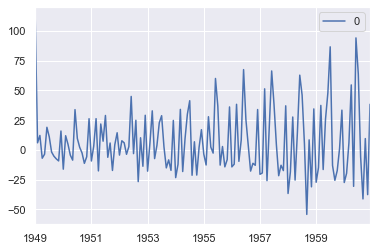

In [103]:
#Residuals
residuals = pd.DataFrame(res.resid)
residuals.plot()

### Missing values

In [65]:
time_index = pd.date_range("1/01/2021", periods=6, freq="W")
df = pd.DataFrame(index=time_index);
print(df)
df["Sales"] = [5.0,4.0,np.nan,np.nan,1.0,np.nan];
print(df)

Empty DataFrame
Columns: []
Index: [2021-01-03 00:00:00, 2021-01-10 00:00:00, 2021-01-17 00:00:00, 2021-01-24 00:00:00, 2021-01-31 00:00:00, 2021-02-07 00:00:00]
            Sales
2021-01-03    5.0
2021-01-10    4.0
2021-01-17    NaN
2021-01-24    NaN
2021-01-31    1.0
2021-02-07    NaN


In [66]:
#Interpolating missing values
df1= df.interpolate();
print(df1)

            Sales
2021-01-03    5.0
2021-01-10    4.0
2021-01-17    3.0
2021-01-24    2.0
2021-01-31    1.0
2021-02-07    1.0


In [67]:
#Forward-fill Missing Values - Using value of next row to fill the missing value
df2 = df.ffill()
print(df2)

            Sales
2021-01-03    5.0
2021-01-10    4.0
2021-01-17    4.0
2021-01-24    4.0
2021-01-31    1.0
2021-02-07    1.0


In [68]:
#Backfill Missing Values - Using value of previous row to fill the missing value
df3 = df.bfill();
print(df3)

            Sales
2021-01-03    5.0
2021-01-10    4.0
2021-01-17    1.0
2021-01-24    1.0
2021-01-31    1.0
2021-02-07    NaN


In [69]:
#Interpolating Missing Values But Only Up One Value
df4 = df.interpolate(limit=1, limit_direction="forward");
print(df4)

            Sales
2021-01-03    5.0
2021-01-10    4.0
2021-01-17    3.0
2021-01-24    NaN
2021-01-31    1.0
2021-02-07    1.0


In [70]:
#Interpolating Missing Values But Only Up Two Values
df5 = df.interpolate(limit=2, limit_direction="forward");
print(df5)

            Sales
2021-01-03    5.0
2021-01-10    4.0
2021-01-17    3.0
2021-01-24    2.0
2021-01-31    1.0
2021-02-07    1.0


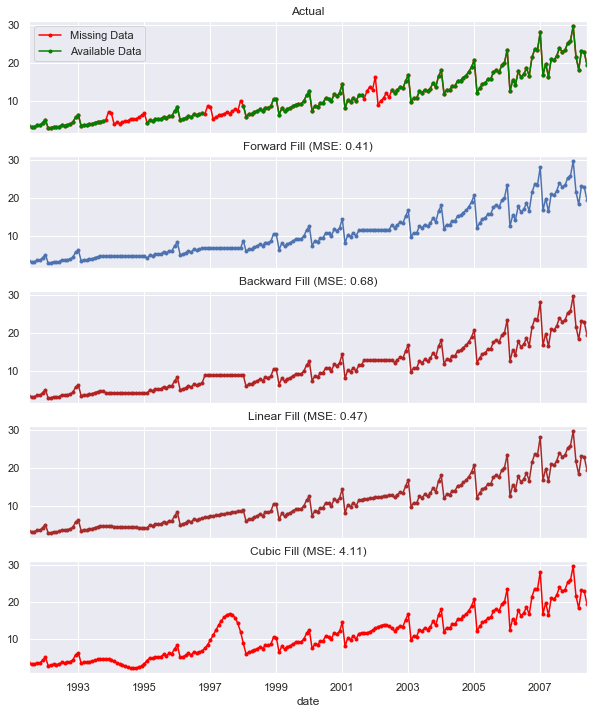

In [71]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_orig = pd.read_csv('a10.csv', parse_dates=['date'], index_col='date')
df = pd.read_csv('a10_missings.csv', parse_dates=['date'], index_col='date', sep=';')

fig, axes = plt.subplots(5, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html